(labs:cor7)=
# Hough transform

The objectives of this exercise are:
* to detect lines in an image with the Hough transform
* to know how to interpret a Hough transform

In [13]:
from math import pi

from numpy import cos, sin, rad2deg

from skimage.io import imread
from skimage.feature import canny
from skimage.transform import hough_line, hough_line_peaks

from matplotlib.pyplot import figure, imshow, title, subplot, plot, show, plot, xlabel, ylabel, axis, axis

In [14]:
x = imread("L.png")
x = x #/255

The Hough transform is applied to binary images, which must highlight the lines of the image.
Also, an edge detection is needed.
We apply the Canny detector (with the default parameters).

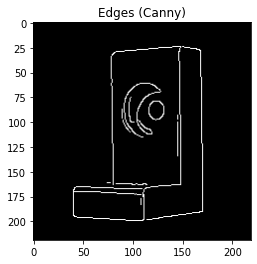

In [15]:
y = canny(x)
figure
imshow(y, cmap="gray")
title("Edges (Canny)")
show()

The function `hough_line` returns the accumulator and the corresponding x-axis and y-axis.

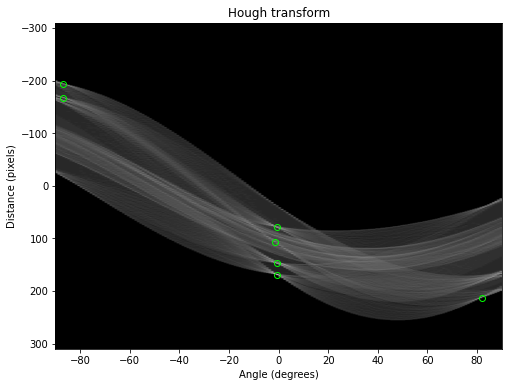

In [16]:
accumulator, angle, dist  = hough_line(y)
peaks, angles, dists = hough_line_peaks(accumulator, angle, dist, threshold=.1*accumulator.max(), num_peaks=7)

axes = (rad2deg(angle[0]), rad2deg(angle[-1]), dist[-1], dist[0])

figure(figsize=(8,6))
imshow(accumulator**.5, cmap="gray", extent=axes, aspect="auto")
xlabel('Angle (degrees)')
ylabel('Distance (pixels)')
title("Hough transform")
plot(rad2deg(angles), dists, marker='o', markeredgecolor='lime', markerfacecolor="none", linestyle="none")
show()

We can see clearly the sinusoids, each corresponding to a white pixel of the image of the contours
(actually, we have done an image transformation to bring out the sinusoids).
When the sinusoids intersect, they increase the intensity of the intersection pixel.
The brightest pixels of the transform correspond to the main lines of the edges.
The function `hough_line_peak` brings these pixels:
the most important are represented by the green circles on the accumulator,
and correspond to the lines shown in the image below.

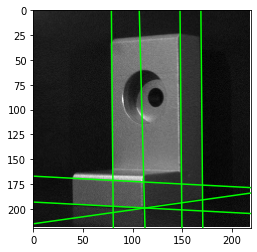

In [17]:
M, N = x.shape

figure
imshow(x, cmap="gray")

for _, angle, dist in zip(peaks, angles, dists):
    
    # Coordonnée de la ligne
    x0 = 0
    y0 = dist / sin(angle)
    x1 = N
    y1 = (dist - x1*cos(angle)) / sin(angle)
    
    # Tracé de la ligne
    plot((x0, x1), (y0, y1), color='lime')

axis((0,N,M,0))
show()

Can you identify where the non-detected lines of the image are on the accumulator?

Try to detect the central circle of the object.